In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
from random import random,randint
from numpy import exp,var,average,log,sqrt

    Changes the initial state to final states returns energy change,and change of magnetiztion

In [4]:
# N=100
# J=1
# beta=0.01

## UPDATION ALGO

In [5]:
from random import random,randint
from numpy import exp

def update_state(state,N,J,beta):
    sitex=randint(0,N-1)
    sitey=randint(0,N-1)
    newsp=state[sitex][sitey]*-1
    osp=state[sitex][sitey]

    if sitex==0:
        xm=N-1
    else:
        xm=sitex-1
    if sitey==0:
        ym=N-1
    else:
        ym=sitey-1
        
    if sitex==N-1:
        Xm=0
    else:
        Xm=sitex+1
    if sitey==N-1:
        Ym=0
    else:
        Ym=sitey+1

    de=(state[xm][sitey]+state[Xm][sitey]+
        state[sitex][ym]+state[sitex][Ym])*osp*J*2
    if de<0:
        state[sitex][sitey]*=(-1)
    else:
        ex=exp(-de*beta)
        rd=random()
        if rd<ex:
            state[sitex][sitey]*=(-1)
        else:
            de=0
    dsp=state[sitex][sitey]-osp
    return state,de,dsp

def initialize_HT(N,J):
    state=[[randint(0,1) for i in range(N)] for j in range(N)]
    for i in range(N):
        for j in range(N):
            if state[i][j]==0:
                state[i][j]=-1
    e=0
    for i in range(N):
        x1,x2=i-1,i+1
        x1=(x1+N)%N
        x2=(x2+N)%N
        for j in range(N):
            y1,y2=j-1,j+1
            y1=(y1+N)%N
            y2=(y2+N)%N
            e+=(state[x1][j]+state[x2][j]+state[i][y1]+state[i][y2])*state[i][j]*(-J)
    m=sum(sum(state[i][j] for i in range(N)) for j in range(N))
    return state,e,m
    
    
def initialize_ZT(N,J):
    state=[[-1 for i in range(N)] for j in range(N)]
    e=0
    for i in range(N):
        x1,x2=i-1,i+1
        x1=(x1+N)%N
        x2=(x2+N)%N
        for j in range(N):
            y1,y2=j-1,j+1
            y1=(y1+N)%N
            y2=(y2+N)%N
            e+=(state[x1][j]+state[x2][j]+state[i][y1]+state[i][y2])*state[i][j]*(-J)
    m=sum(sum(state[i][j] for i in range(N)) for j in range(N))
    return state,e,m

In [17]:
N=50
J=1
T=3
beta=1/T

In [44]:
istate,e,m=initialize_ZT(N,1)
ZE=[e]
ZM=[m]
# print(state)
print("ENERGY = ",e)
print("Magnetization = ",m)
state=[[i for i in j] for j in istate]
count=0
Ztime=[0]

ENERGY =  -10000
Magnetization =  -2500


In [45]:
for i in range(3000):
    if i%100==0:
        print(i,end=",")
#     plt.savefig("../../REPORT/pics/anim/ising50x50_"+str(i)+"_thermalization.png")
    e,m=0,0
    count+=1
    for j in range (N*N):
        state,de,dm=update_state(state,N,J,beta)
        e+=de
        m+=dm
    Ztime.append(count)
    ZE.append(ZE[-1]+e)
    ZM.append(ZM[-1]+m)

0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600,2700,2800,2900,

In [47]:
ZpE=[i+7500 for i in ZE]

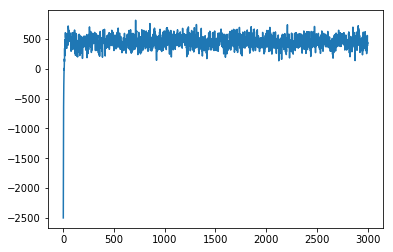

In [48]:
plt.plot(Ztime,ZpE)

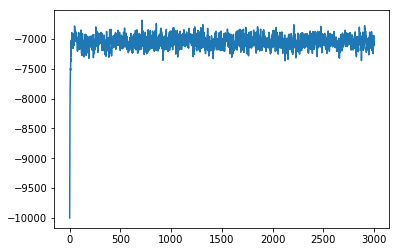

In [46]:
plt.plot(Ztime,ZE)

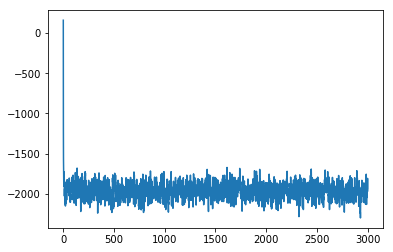

In [43]:
plt.plot(Htime,HE)

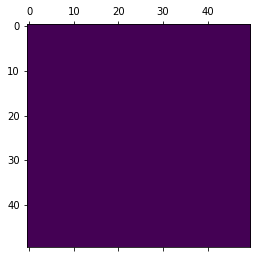

In [79]:
plt.matshow(istate)

In [80]:
beta=1/40
J=1

In [85]:
state=[[i for i in j] for j in istate]

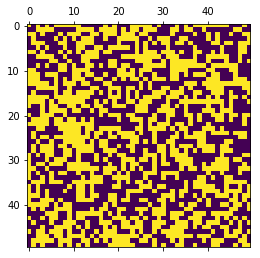

In [77]:
plt.matshow(state)

In [62]:
J=1
T=[]
x=0.2
sweep_max=8000
for i in range(25):
    T.append(x)
    x+=0.2
NUMS=[10]
T=[3]
for N in NUMS:
    for temp in T:
        istate,e,m=initialize_ZT(N,J)
        beta=1/temp
        n=[]
        E=[]
        M=[]
        step=int(sweep_max/20)
        node_step=0
        p_step=step*100/sweep_max
        p=0
        t_s="{0:.2f}".format(temp)
        print("Initializint T = ",t_s," , N = ",N," , J = ",J)
        state,e,m=initialize_ZT(N,J)
        state=list(istate)
        print("ENERGY = ",e,end="   ,    ")
        print("Magnetization = ",m)
        M.append(m)   
        E.append(e)
        n.append(0)
        for sweep in range(int(sweep_max)):
            for j in range(N*N):
                state,de,dm=update_state(state,N,J,beta)
                e+=de
                m+=dm
            n.append(sweep)
            M.append(m)   
            E.append(e)
            if sweep>node_step:
                node_step+=step
                p+=p_step
                print(p,"%",end=",")
        plt.plot(n,E)
        print( " DONE !!\n__________________________________________________"+
              "______________________________________________\n")
print(var(E))
print(average(E))
for N in NUMS:
    for temp in T:
        istate,e,m=initialize_ZT(N,J)
        beta=1/temp
        n=[]
        E=[]
        M=[]
        step=int(sweep_max/20)
        node_step=0
        p_step=step*100/sweep_max
        p=0
        t_s="{0:.2f}".format(temp)
        print("Initializint T = ",t_s," , N = ",N," , J = ",J)
        state,e,m=initialize_ZT(N,J)
        state=list(istate)
        print("ENERGY = ",e,end="   ,    ")
        print("Magnetization = ",m)
        M.append(m)   
        E.append(e)
        n.append(0)
        K=[0,0]
        for sweep in range(int(sweep_max)):
            for j in range(N*N):
                state,de,dm=update_state_site_specific(state,N,J,beta,K)
                e+=de
                m+=dm
            n.append(sweep)
            M.append(m)   
            E.append(e)
            if sweep>node_step:
                node_step+=step
                p+=p_step
                print(p,"%",end=",")
#         plt.plot(n,E)
        print( " DONE !!\n__________________________________________________"+
              "______________________________________________\n")
print(var(E))
print(average(E))

Initializint T =  3.00  , N =  10  , J =  1
ENERGY =  -400   ,    Magnetization =  -100
5.0 %,10.0 %,15.0 %,20.0 %,25.0 %,30.0 %,35.0 %,40.0 %,45.0 %,

KeyboardInterrupt: 

In [9]:
J=1
T=[]
x=0.2
for i in range(25):
    T.append(x)
    x+=0.2
NUMS=[5,10]

for N in NUMS:
#     state=istate
    for temp in T:
        istate,e,m=initialize_ZT(N,J)
        beta=1/temp
        n=[]
        E=[]
        M=[]
        sweep_max=int(1e4)
        step=int(sweep_max/20)
        node_step=0
        p_step=step*100/sweep_max
        p=0
        t_s="{0:.2f}".format(temp)
        print("Initializint T = ",t_s," , N = ",N," , J = ",J)
        state,e,m=initialize_ZT(N,J)
        state=list(istate)
        print("ENERGY = ",e,end="   ,    ")
        print("Magnetization = ",m)
        for sweep in range(int(sweep_max)):
            for j in range(N*N):
                state,de,dm=update_state(state,N,J,beta)
                e+=de
                m+=dm
            n.append(sweep)
            M.append(m)   
            E.append(e)
            if sweep>node_step:
                node_step+=step
                p+=p_step
                print(p,"%",end=",")
        print(" writing to file .. ",end="")
        f=open('DATA/MC_icing_model_data/N_'+str(N)+'_T_'+str(t_s)+"_icingMC_preDef",'w')
        f.write("#T , "+str(temp)+"\n")
        f.write("#N , "+str(N)+"\n")
        f.write("#MC ALGO , Metro\n")
        f.write("#Initialization , ZT\n")
        f.write("#sweeps , "+str(sweep_max)+"\n")
        f.write("#sweep,E,M\n")
        for i,j,k in zip(n,E,M):
            f.write(str(i)+","+str(j)+","+str(k)+"\n")
        f.write("#istate \n")
        for i in range(N):
            f.write(str(istate[i][0]))
            for j in range(1,N):
                f.write(","+str(istate[i][j]))
            f.write("\n")
        f.write("#fstate \n")
        for i in range(N):
            f.write(str(state[i][0]))
            for j in range(1,N):
                f.write(","+str(state[i][j]))
            f.write("\n")
        f.close()
        print( " DONE !!\n__________________________________________________"+
              "______________________________________________\n")

Initializint T =  0.20  , N =  5  , J =  1
ENERGY =  -100   ,    Magnetization =  -25
5.0 %,10.0 %,15.0 %,20.0 %,25.0 %,30.0 %,35.0 %,40.0 %,45.0 %,50.0 %,55.0 %,60.0 %,65.0 %,70.0 %,75.0 %,80.0 %,85.0 %,90.0 %,95.0 %,100.0 %, writing to file ..  DONE !!
________________________________________________________________________________________________

Initializint T =  0.40  , N =  5  , J =  1
ENERGY =  -100   ,    Magnetization =  -25
5.0 %,10.0 %,15.0 %,20.0 %,25.0 %,30.0 %,35.0 %,40.0 %,45.0 %,50.0 %,55.0 %,60.0 %,65.0 %,70.0 %,75.0 %,80.0 %,85.0 %,90.0 %,95.0 %,100.0 %, writing to file ..  DONE !!
________________________________________________________________________________________________

Initializint T =  0.60  , N =  5  , J =  1
ENERGY =  -100   ,    Magnetization =  -25
5.0 %,10.0 %,15.0 %,20.0 %,25.0 %,30.0 %,35.0 %,40.0 %,45.0 %,50.0 %,55.0 %,60.0 %,65.0 %,70.0 %,75.0 %,80.0 %,85.0 %,90.0 %,95.0 %,100.0 %, writing to file ..  DONE !!
_______________________________________

5.0 %,10.0 %,15.0 %,20.0 %,25.0 %,30.0 %,35.0 %,40.0 %,45.0 %,50.0 %,55.0 %,60.0 %,65.0 %,70.0 %,75.0 %,80.0 %,85.0 %,90.0 %,95.0 %,100.0 %, writing to file ..  DONE !!
________________________________________________________________________________________________

Initializint T =  5.00  , N =  5  , J =  1
ENERGY =  -100   ,    Magnetization =  -25
5.0 %,10.0 %,15.0 %,20.0 %,25.0 %,30.0 %,35.0 %,40.0 %,45.0 %,50.0 %,55.0 %,60.0 %,65.0 %,70.0 %,75.0 %,80.0 %,85.0 %,90.0 %,95.0 %,100.0 %, writing to file ..  DONE !!
________________________________________________________________________________________________

Initializint T =  0.20  , N =  10  , J =  1
ENERGY =  -400   ,    Magnetization =  -100
5.0 %,10.0 %,15.0 %,20.0 %,25.0 %,30.0 %,35.0 %,40.0 %,45.0 %,50.0 %,55.0 %,60.0 %,65.0 %,70.0 %,75.0 %,80.0 %,85.0 %,90.0 %,95.0 %,100.0 %, writing to file ..  DONE !!
________________________________________________________________________________________________

Initializint T =  0.40  ,

KeyboardInterrupt: 

In [ ]:
def write_data(fname,data,N,t_s,Algo="MCMC",initial="ZT",rmrks=""):
    f=open(fname,'w')
    f.write("#T , "+str(t_s)+"\n")
    f.write("#N , "+str(N)+"\n")
    f.write("#MC ALGO , "+Algo+"\n")
    f.write("#Initialization ,"+initial+"\n")
    n,E,M=data['time'],data['energy'],data['magentization']
    istate,state=data['istate'],data['fstate']
    f.write("#remarks , "+rmrks+"\n")
    f.write("#sweeps , "+str(len(E))+"\n")
    f.write("#sweep,E,M\n")
    for i,j,k in zip(n,E,M):
        f.write(str(i)+","+str(j)+","+str(k)+"\n")
    
    f.write("#istate \n")
    for i in range(len(istate)):
        f.write(str(istate[i][0]))
        for j in range(1,N):
            f.write(","+str(istate[i][j]))
        f.write("\n")
        
    f.write("#fstate \n")
    for i in range(len(state)):
        f.write(str(state[i][0]))
        for j in range(1,N):
            f.write(","+str(state[i][j]))
        f.write("\n")
    f.close()

In [1]:
def get_data(fname):
    f=open(fname,'r')
    l=f.readline()
    params=dict()
    while "#"==l[0]:
        l=l[:-1].replace("#","")
        it=l.split(",")
        try:
            params.update({it[0]:int(it[1])})
        except:
            try:
                params.update({it[0]:float(it[1])})
            except:
                params.update({it[0]:it[1]})
        l=f.readline()
        
    sw,en,mag=[],[],[]
    while l and "#"!=l[0]:
        it=l[:-1].split(",")
        sw.append(int(it[0]))
        en.append((float(it[1])))
        mag.append(abs(float(it[2])))
        l=f.readline()
    istate=[]
    if "#istate" in l:
        l=f.readline()
        while l and "#"!=l[0]:
            it=l[:-1].split(",")
            row=[int(i) for i in it]
            istate.append(row)
            l=f.readline()
    fstate=[]
    if "#fstate" in l:
        l=f.readline()
        while l and "#"!=l[0]:
            it=l[:-1].split(",")
            row=[int(i) for i in it]
            fstate.append(row)
            l=f.readline()
    rslt={'params':params,'istate':istate,'fstate':fstate,'time':sw,'energy':en,'magentization':mag}
    f.close()
    return rslt

In [5]:
from scipy.optimize import curve_fit
def __fu(x,a,b):
    return a*exp(-x/b)

def get_correlation_values(T,E,M,K,K_fit=None,tol=0.10):
    if K_fit==None:
        K_fit=K
    c=acf(M,nlags=K,fft=True)
    a,b1=curve_fit(__fu,[i for i in range(len(c[:K_fit]))],c[:K_fit])
    t1=int(a[1])+1
    c=acf(E,nlags=K,fft=True)
#     print(len(c),len([i for i in range(len(c[:K_fit]))]),len(c[:K_fit]),K_fit)
    a,b2=curve_fit(__fu,[i for i in range(len(c[:K_fit]))],c[:K_fit])
    t2=int(a[1])+1
    
    if t1>t2:
        tau= t1
        err=sqrt(b1[1][1])
    else:
        tau=t2
        err=sqrt(b2[1][1])
    
    if err/tau > 0.15:
        return tau,err,False
    return tau,err,True
    

In [4]:
def sample_data(data,K,return_params=False):
    tau,err,status=get_correlation_values(data['time'][-K:],data['energy'][-K:],data['magentization'][-K:],K=K)
    if not status:
        return dict(),tau,err
    step=max(2*tau,25)
#     print(tau,err,step)
    L=len(data['time'])-1
    sample=dict()
    for i in data.keys():
        sample.update({i:[]})
    for i in range(int(K/step)):
        st=i*step
        sample['time'].append(data['time'][L-st])
        sample['energy'].append(data['energy'][L-st])
        sample['magentization'].append(data['magentization'][L-st])
    if return_params:
        return sample,tau,err
    else:
        return sample

In [16]:
%matplotlib agg
%matplotlib agg
plt.ioff()

In [ ]:
fname='DATA/MC_icing_model_data/N_'+str(N)+'_T_'+str(t_s)+"_icingMC"
data_h=get_data(fname)

In [31]:
x=0.2
T=[]
for i in range(24):
    T.append(x)
    x+=0.2
NUMS=[100,5]
K=10000
loga=open('log','a')
from datetime import datetime as dt
loga.write("\n\n" + str(dt.now())+"\n")
from statsmodels.tsa.stattools import acf 

for N in NUMS:
    for temp in T:
        try:
            if temp<0.5:
                continue
            t_s="{0:.2f}".format(temp)
            fname='DATA/MC_2Dising_model_data_serc/N_'+str(N)+'_T_'+str(t_s)+"_icingMC"
            data_h=get_data(fname)
            s_data,tau,err=sample_data(data_h,K,True)
            txt="sampled_for_anly with "+str(tau)+" and "+str(err)
            write_data('DATA/sampled/N_'+str(N)+'_T_'+str(t_s)+"_icingMC",s_data,N,t_s,rmrks=txt)
            c=acf(data_h['magentization'],nlags=K,fft=True)
            print(N," , ",t_s," -> tau :",tau," err : ",err)
            loga.write(str(N)+" , "+t_s+" -> tau :"+str(tau)+" err : "+str(err))
            f,ax=plt.subplots(nrows=1,ncols=1)
            ax.plot([i for i in range(len(c[:K]))],c[:K])
            ax.set_title("t,e : "+str(tau)+","+str(err))
            f.savefig("DATA/PICS/"+"N_"+str(N)+"_T_"+str(temp)+".png")
            plt.close('all')
        except:
            print(N,t_s, "wrong")           
            loga.write(str(N)+" , "+str(t_s)+ "wrong"+"\n")
loga.write("\n" + str(dt.now())+"\n_____________________________\n")
loga.close()

100  ,  0.60  -> tau : 2  err :  0.019173786993799145
100  ,  0.80  -> tau : 2  err :  0.01752762424840103
100  ,  1.00  -> tau : 2  err :  0.019092963044682637
100  ,  1.20  -> tau : 2  err :  0.020082849758145126
100  ,  1.40  -> tau : 2  err :  0.022576704096577162
100  ,  1.60  -> tau : 2  err :  0.02728052380209214
100  ,  1.80  -> tau : 4  err :  0.058221562969003764
100  ,  2.00  -> tau : 15  err :  0.30065474360016076
100  ,  2.20  -> tau : 401  err :  7.389646156391158
100  ,  2.40  -> tau : 192  err :  3.0308640672574136
100  ,  2.60  -> tau : 27  err :  0.44679330349807367
100  ,  2.80  -> tau : 12  err :  0.19679474035527436
100  ,  3.00  -> tau : 6  err :  0.10122940540972923
100  ,  3.20  -> tau : 5  err :  0.07000267691995025
100  ,  3.40  -> tau : 3  err :  0.049206103098783045
100  ,  3.60  -> tau : 3  err :  0.04109186986659335
100  ,  3.80  -> tau : 3  err :  0.03657736956161406
100  ,  4.00  -> tau : 2  err :  0.02750815694018056
100  ,  4.20  -> tau : 2  err :  0.0

/home/aravind/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


5 0.60 wrong
5  ,  0.80  -> tau : 2  err :  0.02066583915524011
5  ,  1.00  -> tau : 2  err :  0.022042244065190335
5  ,  1.20  -> tau : 2  err :  0.01875460418381515
5  ,  1.40  -> tau : 3  err :  0.04031006283770842
5  ,  1.60  -> tau : 2  err :  0.025894296594197105
5  ,  1.80  -> tau : 3  err :  0.0364509049556195
5  ,  2.00  -> tau : 4  err :  0.05415092869700927
5  ,  2.20  -> tau : 5  err :  0.0768749357544835
5  ,  2.40  -> tau : 5  err :  0.07403145088461242
5  ,  2.60  -> tau : 5  err :  0.07385437648526373
5  ,  2.80  -> tau : 4  err :  0.05460682463713823
5  ,  3.00  -> tau : 4  err :  0.053786328580071034
5  ,  3.20  -> tau : 3  err :  0.036125703950177196
5  ,  3.40  -> tau : 3  err :  0.037180217106084455
5  ,  3.60  -> tau : 2  err :  0.024558378066940757
5  ,  3.80  -> tau : 2  err :  0.023757455729389112
5  ,  4.00  -> tau : 2  err :  0.019116779358992083
5  ,  4.20  -> tau : 2  err :  0.01756636806577237
5  ,  4.40  -> tau : 2  err :  0.017883488895083094
5  ,  4.60 

In [3]:
def jacknife(A,func):
    c0=func(A)
    sig=0
    for i in range(len(A)):
        temp=A.pop(0)
        c=func(A)
        sig+=(c-c0)**2
        A.append(temp)
    return c0,sqrt(sig)

In [2]:
def variance(X):
    return var(X)

def Average(X):
    return average(X)
        
def analyze(temparature,L,E,M):
    print("going to jacknife",temparature)
    mag,mag_err=jacknife(M,Average)
    sp_heat,sp_heat_err=jacknife(E,variance)
    sp_heat/=(temparature*temparature*L)
    print("going to jacknife",temparature)
    sp_heat_err/=(temparature*temparature*L)
    sucep,sucep_err=jacknife(M,variance)
    sucep*=(L/temparature)
    sucep_err*=(L/temparature)
    return [mag,mag_err],[sp_heat,sp_heat_err],[sucep,sucep_err]
    

In [85]:
Xy=analyze(0.60,100*100,data['energy'],data['magentization'])

In [84]:
data=h=get_data('DATA/sampled/N_100_T_0.60_icingMC')

In [87]:
Xy

([9999.97, 0.012185710056106504],
 [0.00026266666666666664, 0.00010533123327994327],
 [985.0, 394.9921247997873])

In [ ]:
x=0.2
T=[]
for i in range(24):
    T.append(x)
    x+=0.2
NUMS=[100,5]

f=open("DATA/results",'w')
f.write("Temp")
for N in NUMS:
    f.write(",N_"+str(N)+"_mag"+",N_"+str(N)+"_magErr"+",N_"+str(N)+"_sp_heat"+",N_"+str(N))
    f.write("_sp_heatErr"+",N_"+str(N)+"_succep"+",N_"+str(N)+"_succepErr")
f.write("\n")
for temp in T:
    t_s="{0:.2f}".format(temp)
    f.write(t_s)
    for N in NUMS:
        try:
            if temp<0.5:
                continue
            print("AT ",N," , ",t_s," -> ",end="")
            fname='DATA/MC_2Dising_model_data_serc/N_'+str(N)+'_T_'+str(t_s)+"_icingMC"
            data_h=get_data(fname)
            print("gotData->Analyzing",end="")
            ana=analyze(temp,N**2,data_h['energy'],data_h['magentization'])
            print("Analyzed->writing",end="")
            f.write(","+str(ana[0][0])+","+str(ana[0][1]))
            f.write(","+str(ana[1][0])+","+str(ana[1][1]))
            f.write(","+str(ana[2][0])+","+str(ana[2][1]))  
            print("Wrote",end="\n")
        except:
            print("!! ",N,t_s)
    f.write("\n")
f.close()

In [83]:
f=open('DATA/results_serc','r')
l=f.readline()
it=l[:-1].split(",")
compiled_data=dict()
key=[]
for i in it:
    compiled_data.update({i:[]})
    key.append(i)
l=f.readline()
l=f.readline()
l=f.readline()
while l:
    l=l.replace("\n","")
    it=l.split(",")
    for i,k in zip(it,key):
        compiled_data[k].append(float(i))
    l=f.readline()
# key.pop(0)

In [74]:
 keygen=['N_)(_mag',
 'N_)(_magErr',
 'N_)(_sp_heat',
 'N_)(_sp_heatErr',
 'N_)(_succep',
 'N_)(_succepErr',
         'Temp']

In [67]:
NUMS=[5,10,12,15,18,20,25,50,64,100]

In [81]:
keymap=[]
keyErrmap=[]
key=keygen[4]
keyErr=keygen[5]
for N in NUMS:
    keymap.append(key.replace('_)(_',"_"+str(N)+"_"))
    keyErrmap.append(keyErr.replace('_)(_',"_"+str(N)+"_"))    
print(keyErrmap)
   

['N_5_succepErr', 'N_10_succepErr', 'N_12_succepErr', 'N_15_succepErr', 'N_18_succepErr', 'N_20_succepErr', 'N_25_succepErr', 'N_50_succepErr', 'N_64_succepErr', 'N_100_succepErr']


In [102]:
scale=[]
scaleErr=[]
scaleN=[]
for i,j,N in zip(keymap,keyErrmap,NUMS):
    x=max(compiled_data[i])
    idx=compiled_data[i].index(x)
    scale.append(x)
    scaleErr.append(compiled_data[j][idx])
    scaleN.append(N*N)

In [106]:
scale_log=[log(i) for i in scale]
scale_logErr=[j/i for i,j in zip(scale,scaleErr)]

<IPython.core.display.Javascript object>


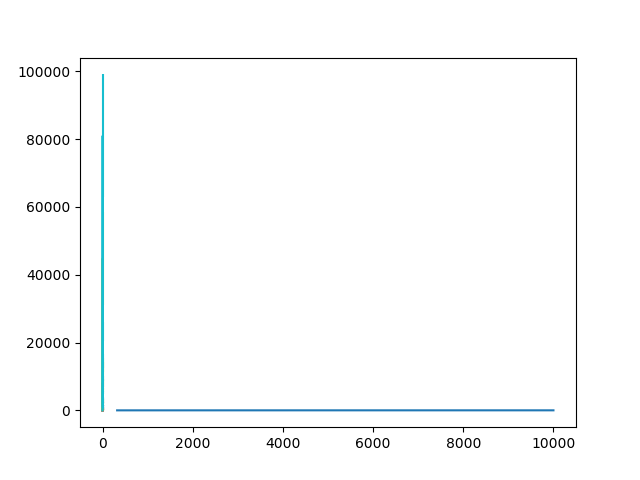

<Container object of 3 artists>

In [111]:
plt.errorbar(scaleN,scale_log,scale_logErr)

In [113]:
%matplotlib notebook

N_5_succep N_5_succepErr


<IPython.core.display.Javascript object>


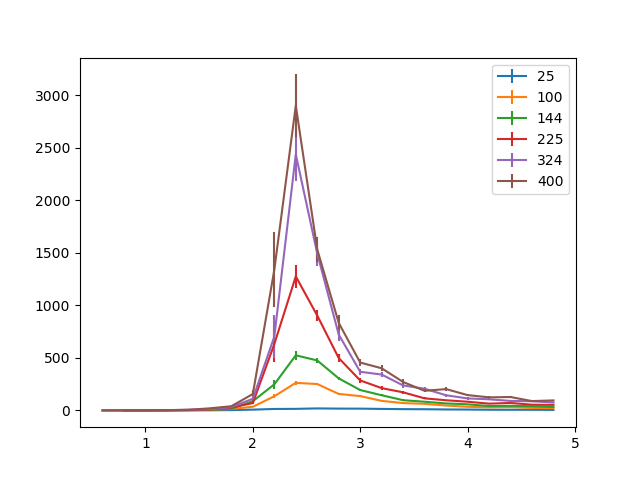

N_10_succep N_10_succepErr
N_12_succep N_12_succepErr
N_15_succep N_15_succepErr
N_18_succep N_18_succepErr
N_20_succep N_20_succepErr


In [116]:
K=4
for i,j,n in zip(keymap[:-K],keyErrmap[:-K],NUMS):
    N=n**2
    print(i,j)
#     plt.scatter(compiled_data['Temp'],[t/N for t in compiled_data[i]],[q/N for q ina compiled_data[j]])
    plt.errorbar(compiled_data['Temp'],[t/N for t in compiled_data[i]],[q/N for q in compiled_data[j]],label=str(N))
plt.legend(loc=0)